Task-2: Implement a Machine Learning Model for Regression Problem

Step-1: Data Cleaning and Preprocessing

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing file
from google.colab import files
uploaded = files.upload()

Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31.csv


In [3]:
#making a dataframe "ap"
ap= pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
#calling the dataframe
ap

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [5]:
#displaying 1st 5 rows of dataframe
ap.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Step-2: Exploratory Data Analysis

In [6]:
#descriibing the statistics of data
ap.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [7]:
#displaying information of data
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [8]:
#checking for null values in dataset
ap.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [9]:
#removing the null values which are present
ap=ap.dropna()

In [10]:
#checking whether still any missing data is present
ap.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [11]:
#displaying number of unique values of each column
ap.nunique()

No       41757
year         5
month       12
day         31
hour        24
pm2.5      581
DEWP        69
TEMP        64
PRES        60
cbwd         4
Iws       2723
Is          28
Ir          37
dtype: int64

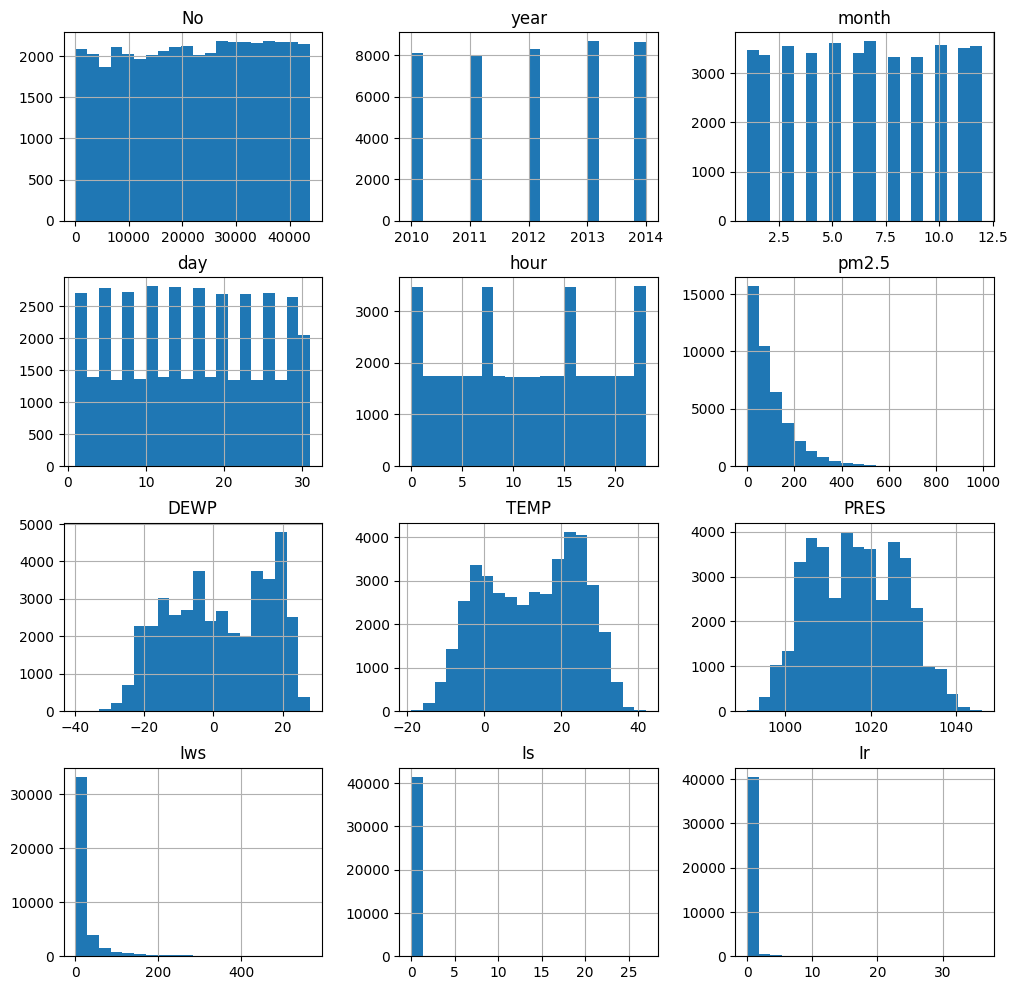

In [12]:
#Histogram plot
ap.hist(bins=20, figsize=(12, 12))
plt.show()

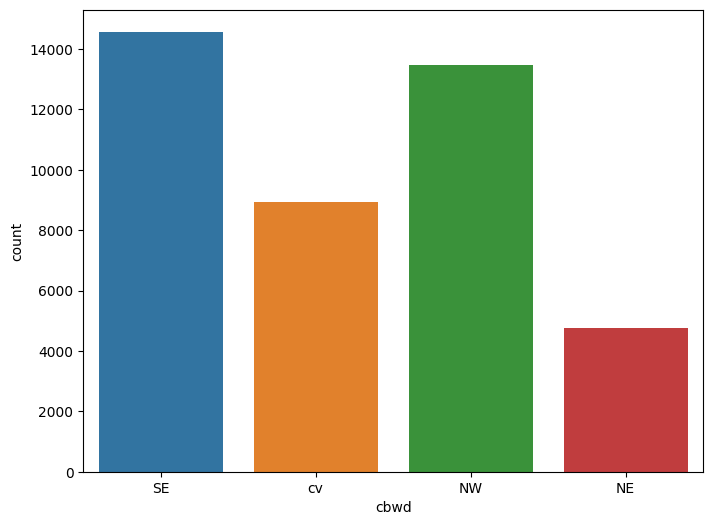

In [13]:
#Countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=ap, x='cbwd')
plt.show()

<ipython-input-14-7c7dab2d35da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ap.corr()


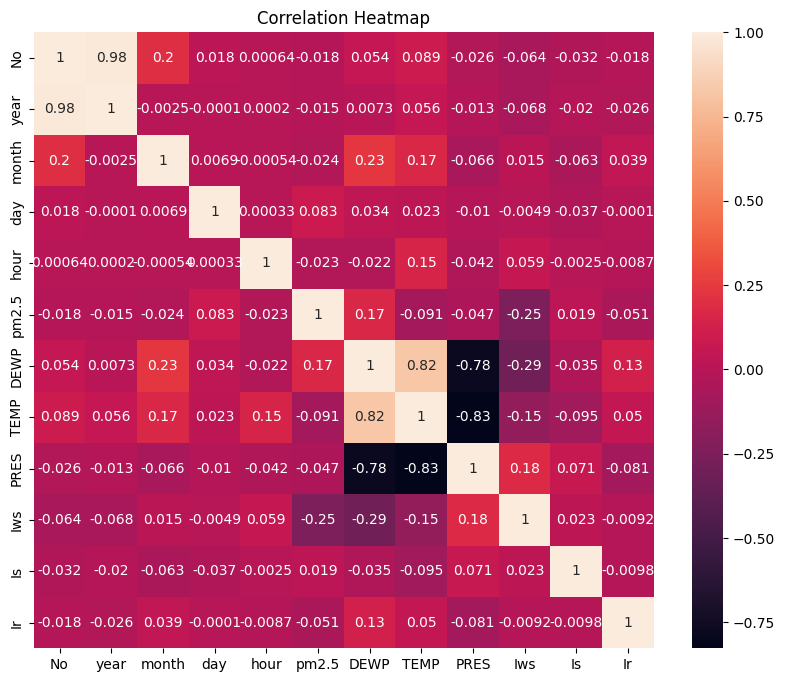

In [14]:
#Heatmap
correlation_matrix = ap.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Step-3: Model Building and Implementation

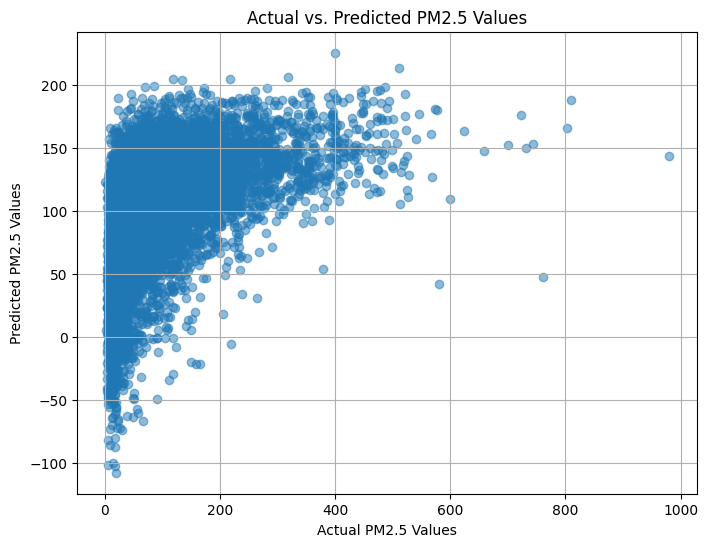

In [23]:
#importing required libraries
#Ridge regressor model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = ap[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']]
y = ap['pm2.5']

# Split the data into training and testing sets
X_train_rr, X_test_rr, y_train_rr, y_test_rr = train_test_split(X, y, test_size=0.2, random_state=42)

# Define columns to one-hot encode (categorical columns)
categorical_cols = ['cbwd']

# Create transformers for numerical and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=np.number).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and train the Ridge Regression model within a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Ridge(alpha=1.0))])

pipeline.fit(X_train_rr, y_train_rr)

# Make predictions on the test set
y_pred_rr = pipeline.predict(X_test_rr)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rr, y_pred_rr, alpha=0.5)
plt.xlabel("Actual PM2.5 Values")
plt.ylabel("Predicted PM2.5 Values")
plt.title("Actual vs. Predicted PM2.5 Values")
plt.grid(True)
plt.show()

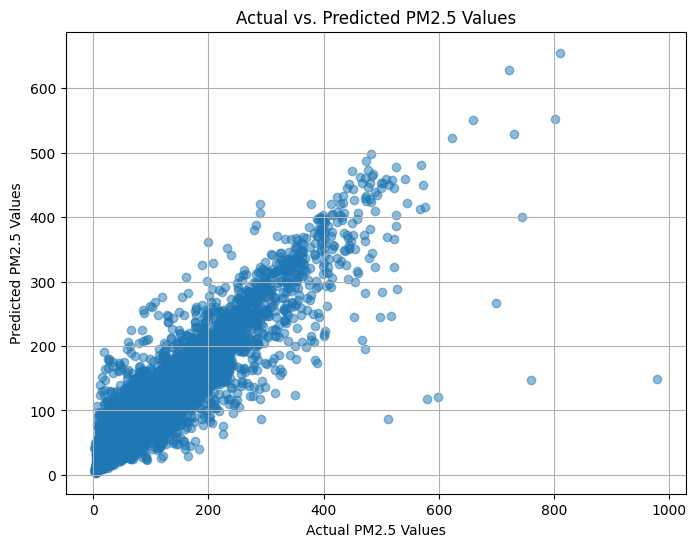

In [24]:
#importing required libraries
#Random forest regressor model
from sklearn.ensemble import RandomForestRegressor

# Step 1: EDA and preprocessing (similar to the previous steps)
# One-hot encode categorical variable "cbwd"
X = pd.get_dummies(ap[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']], columns=['cbwd'])
y = ap['pm2.5']

# Step 2: Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf_regressor.fit(X_train_rf, y_train_rf)

# Step 4: Make predictions and evaluate the model
y_pred_rf = rf_regressor.predict(X_test_rf)

# Plot actual vs. predicted values (similar to previous code)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.5)
plt.xlabel("Actual PM2.5 Values")
plt.ylabel("Predicted PM2.5 Values")
plt.title("Actual vs. Predicted PM2.5 Values")
plt.grid(True)
plt.show()


Step-4: Evaluating the model

In [26]:
#for Ridge regressor model
#importing library
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred_rr = pipeline.predict(X_test_rr)

# Calculate Mean Absolute Error (MAE)
mae_rr = mean_absolute_error(y_test_rr, y_pred_rr)
print("Mean Absolute Error (MAE) for Ridge Regressor:", mae_rr)

# Calculate Mean Squared Error (MSE)
mse_rr = mean_squared_error(y_test_rr, y_pred_rr)
print("Mean Squared Error (MSE) for Ridge Regressor:", mse_rr)

# Calculate Root Mean Squared Error (RMSE)
rmse_rr = np.sqrt(mse_rr)
print("Root Mean Squared Error (RMSE) for Ridge Regressor:", rmse_rr)


Mean Absolute Error (MAE): 56.92769185346804
Mean Squared Error (MSE): 6431.49805817176
Root Mean Squared Error (RMSE): 80.19662123912553


In [27]:
#for Random forest regressor model
# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
print("Mean Absolute Error (MAE) for Random Forest regressor:", mae_rf)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
print("Mean Squared Error (MSE) for Random Forest regressor:", mse_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error (RMSE) for Random Forest regressor:", rmse_rf)


Mean Absolute Error (MAE) for Random Forest regressor: 22.11365780651341
Mean Squared Error (MSE) for Random Forest regressor: 1409.0465197677204
Root Mean Squared Error (RMSE) for Random Forest regressor: 37.53726841111005


In [30]:
# Make predictions on the training and testing data for Ridge regressor
y_train_pred_rr = pipeline.predict(X_train_rr)
y_test_pred_rr = pipeline.predict(X_test_rr)

# Calculate the Mean Squared Error (MSE) for training and testing data
mse_train_rr = mean_squared_error(y_train_rr, y_train_pred_rr)
mse_test_rr = mean_squared_error(y_test_rr, y_test_pred_rr)

print("Mean Squared Error (Training) for Ridge regressor:", mse_train_rr)
print("Mean Squared Error (Testing) for Ridge regressor:", mse_test_rr)


Mean Squared Error (Training) for Ridge regressor: 6069.09531335536
Mean Squared Error (Testing) for Ridge regressor: 6431.49805817176


In [31]:
# Make predictions on the training and testing data for Random Forest regressor
y_train_pred_rf = rf_regressor.predict(X_train_rf)
y_test_pred_rf = rf_regressor.predict(X_test_rf)

# Calculate the Mean Squared Error (MSE) for training and testing data
mse_train_rf = mean_squared_error(y_train_rf, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test_rf, y_test_pred_rf)

print("Mean Squared Error (Training) for Random Forest regressor:", mse_train_rf)
print("Mean Squared Error (Testing) for Random Forest regressor:", mse_test_rf)


Mean Squared Error (Training) for Random Forest regressor: 173.2427163149229
Mean Squared Error (Testing) for Random Forest regressor: 1409.0465197677204


In [32]:
#for comparing models
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Ridge Regressor', 'Random Forest Regressor'],
    'MSE': [mse_rr, mse_rf]
})

print(results)



                     Model          MSE
0          Ridge Regressor  6431.498058
1  Random Forest Regressor  1409.046520


Hence, for the regression problem dataset Riidge regressor is the better model.